# Decision Tree



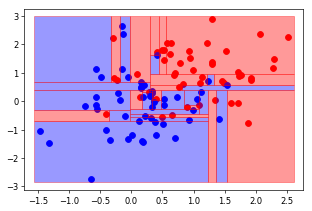

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_DEPTH = 20
SPLIT_SECTIONS = 10

S1 = np.array([[0.5, 0.0],
               [0.0, 0.7]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([0, 0])

class Node:
    X = None
    T = None
    features = 2
    Isleaf = 0
    Left = None
    Right = None
    start = None
    end = None
    split_feature_index = 0
    split_pos = 0
    samples = 0
    depth = 0
    
    def __init__(self, start_x, start_y, end_x, end_y, depth):
        self.depth = depth
        self.sample_num = np.zeros(self.features)
        self.start = np.zeros(self.features)
        self.end = np.zeros(self.features)
        self.start[0] = start_x
        self.start[1] = start_y
        self.end[0] = end_x
        self.end[1] = end_y
        for j in range(len(self.X)):
            if self.X[j][0] >= self.start[0] and self.X[j][0] < self.end[0] \
                and self.X[j][1] >= self.start[1] and self.X[j][1] < self.end[1]:
                self.samples += 1
                self.sample_num[int(self.T[j])] += 1
        #print("new node ", start_x, start_y, end_x, end_y)
        #print(self.samples)
        
        if self.Gini(self.start[0], 0) != 0:
            self.split()
        return
    
    def split(self):
        best_q = 1e10
        for i in range(self.features):
            A = np.linspace(self.start[i], self.end[i], SPLIT_SECTIONS)[1:-1]
            for a in A:
                q = self.Gini(a, i)
                if q < best_q:
                    best_q = q
                    self.split_pos = a
                    self.split_feature_index = i
                    #print("split best", q, i, a)
        
        if self.depth <= MAX_DEPTH:
            lstart = np.copy(self.start)
            lend = np.copy(self.end)
            lend[self.split_feature_index] = self.split_pos
            self.Left = Node(lstart[0], lstart[1], lend[0], lend[1], self.depth+1)
            rstart = np.copy(self.start)
            rend = np.copy(self.end)
            rstart[self.split_feature_index] = self.split_pos
            self.Right = Node(rstart[0], rstart[1], rend[0], rend[1], self.depth+1)
        return

    def Gini(self, a, i):
        n00 = 0
        n01 = 0
        n10 = 0
        n11 = 0
        l = 0
        r = 0
        for j in range(len(self.X)):
            if self.X[j][0] >= self.start[0] and self.X[j][0] < self.end[0] \
                and self.X[j][1] >= self.start[1] and self.X[j][1] < self.end[1]:
                if self.X[j][i] < a:
                    l += 1
                    if self.T[j] == 0:
                        n00 += 1
                    else:
                        n01 += 1
                else:
                    r += 1
                    if self.T[j] == 0:
                        n10 += 1
                    else:
                        n11 += 1
        q = 0
        if l > 0:
            q += ((n00/l)*(1-n00/l) + (n01/l)*(1-n01/l)) * (l/self.samples)
        if r > 0:
            q += ((n10/r)*(1-n10/r) + (n11/r)*(1-n11/r)) * (r/self.samples)
        return q
    
    def draw_region(self, ax):
        if (self.Left is None) and (self.Right is None):
            if self.sample_num[0] > self.sample_num[1]:
                color = 'b'
            else:
                color = 'r'
            # Create a Rectangle patch
            rect = patches.Rectangle((self.start[0], self.start[1]), \
                                     self.end[0]-self.start[0], self.end[1]-self.start[1], \
                                     linewidth=1,edgecolor='r',facecolor=color, alpha=0.4)

            # Add the patch to the Axes
            ax.add_patch(rect)
#             print("region depth", self.depth)
#             print("draw region ", self.start,self.end)
#             print("sample num", self.sample_num)
#             print("Gini coeff", self.Gini(self.start[0], 0))
        if self.Left is not None:
            #print("draw region bypass")
            self.Left.draw_region(ax)
        if self.Right is not None:
            #print("draw region bypass")
            self.Right.draw_region(ax)
        return

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = np.zeros(X2.shape[0])
    T = np.hstack((T1, T2))
    return X, T

def draw_points(ax, X, T):
    for i in range(len(T)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==0:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    return

def build_tree(X, T, ax):
    Node.X = X
    Node.T = T
    root = Node(np.amin(X.T[0])-.1, np.amin(X.T[1])-.1, np.amax(X.T[0])+.1,  np.amax(X.T[1])+.1, 0)
    root.draw_region(ax)
    return

def main():
    fig = plt.figure(figsize=(6,4), dpi=60)
    ax = fig.add_subplot(1,1,1)
    X, T = gen_data(50)
    draw_points(ax, X, T)
    
    build_tree(X, T, ax)

    plt.show()
    
if __name__=="__main__":
    main()